# using CNN(convolution neural network) on CIFAR-10 datasets

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets,layers,models

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0

170498071/170498071 [==============================] - 12s 0us/step


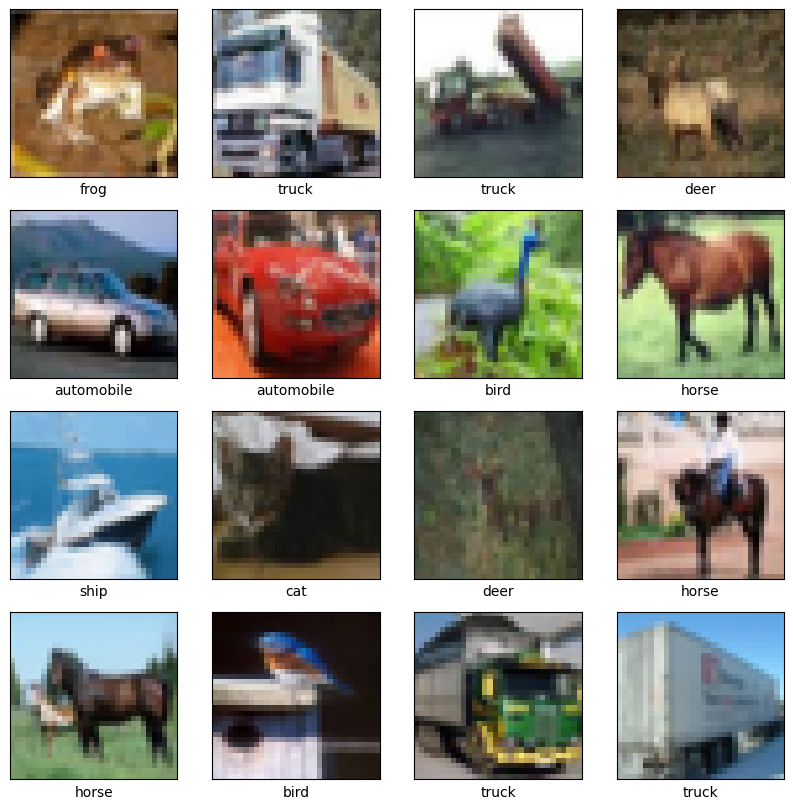

In [4]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()


In [5]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
,metrics=['accuracy'])

history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.5165 - accuracy: 0.4464 - val_loss: 1.2646 - val_accuracy: 0.5496
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1695 - accuracy: 0.5823 - val_loss: 1.0656 - val_accuracy: 0.6231
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0263 - accuracy: 0.6360 - val_loss: 1.0027 - val_accuracy: 0.6482
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9321 - accuracy: 0.6722 - val_loss: 0.9367 - val_accuracy: 0.6745
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8622 - accuracy: 0.6967 - val_loss: 0.8972 - val_accuracy: 0.6878
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7950 - accuracy: 0.7201 - val_loss: 0.9196 - val_accuracy: 0.6807
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7439 - accuracy: 0.7384 - val_loss: 0.9130 - val_accuracy

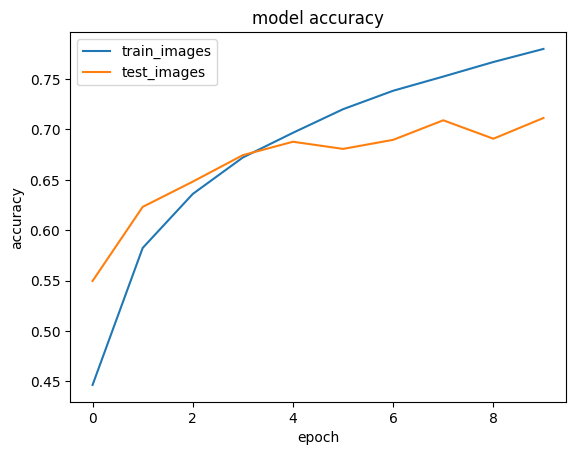

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_images','test_images'],loc='upper left')
plt.show()


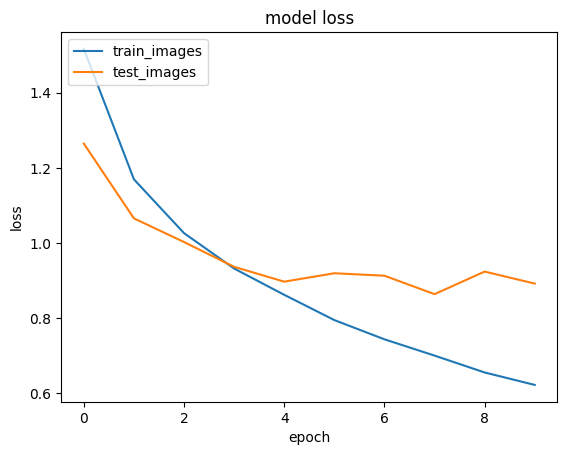

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_images','test_images'],loc='upper left')
plt.show()

In [14]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 0.8921 - accuracy: 0.7114 - 658ms/epoch - 2ms/step


In [15]:
print(test_acc)

0.7113999724388123
